In [1]:
import ugradio
import numpy as np
#%matplotlib inline
import matplotlib.pyplot as plt

# Lab 1 - Day Two - Exploring Digital Sampling, Fourier Transforms, and both DSB and SSB Mixers
## By Adam, Cee, Grace, Scout

# 6.1 The Double-sideband Mixer (DSB Mixer)
Use two SRS synthesizer oscillators as inputs to a mixer, one will be the local oscillator LO with frequency Vlo, the other will be the "signal" with frequencies, Vsig = Vlo +- dv. (Meaning there are two cases, plus and minus). Choose frequency difference dv somewhat small compared to Vlo, like 5%. Input power level of 0dBm for both sythnesizers. 

In [6]:
Vlo = 20
dv = 1
Vsig = 21 and 19

In [2]:
x = ugradio.pico.capture_data('1V', divisor=1, nsamples=1000)
np.savetxt('data_21', x)

In [3]:
x = ugradio.pico.capture_data('1V', divisor=1, nsamples=1000)
np.savetxt('data_19', x)

## Power Spectra for DSB Mixer Data
For the two cases, plot the power spectrum vs frequency. 

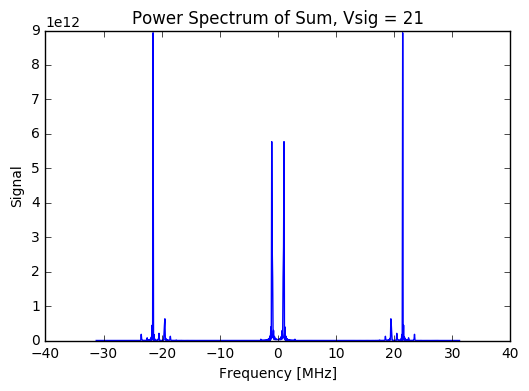

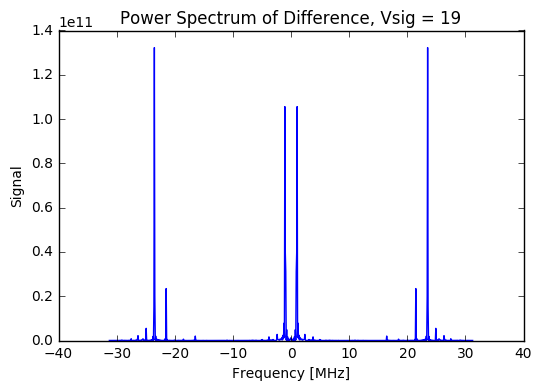

In [7]:
def PS_20(testFile):
    myFile = np.loadtxt(testFile)
    Vsamp = 62.5
    N = 800

    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    f_input = np.linspace(-Vsamp/2, (Vsamp/2)*(1 - (2/N)),N) #N distinct frequencies
    f,fx = ugradio.dft.dft(myFile[:N],t=time, f=f_input, vsamp=Vsamp)
    P = np.abs(fx)**2

    plt.plot(f,P)
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Signal")
    plt.show()

    
plt.title('Power Spectrum of Sum, Vsig = 21') 
PS_20('data_21')

plt.title('Power Spectrum of Difference, Vsig = 19')
PS_20('data_19')

#### Explain why the plots look the way they do, using terms "upper sideband" and "lower sideband". 
For every carrier frequency carrying information, as a result of the modulation process some sidebands are also produced as well that can be extrapolated from a fourier transform process. The upper sidebands come from higher frequencies than the carrier frequencies that get produced from the modulation process and the lower sidebands come from lower frequencies that are by-products of the initial carrier wave frequency. This is why you see two other "spikes" other than the highest amplitude carrier wave frequency.

## Waveforms of DSB Data
For one of the cases, plot the waveform. Does it look like the oscilloscope trace? 

Vsig = 21MHz


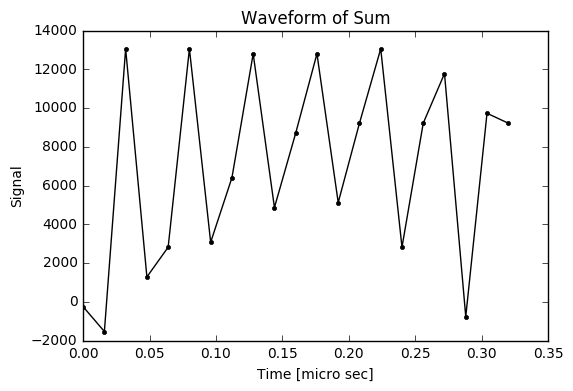

In [25]:
def Wave(file,Vsig):
    
    Vsamp = 62.5 #MHz
    N = 512
    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    
    print('Vsig = {}{}'.format(Vsig, 'MHz'))
    file9 = np.loadtxt(file)
    
    
    
    #time domain signal - plot digitally sampled waveform vs time
    plt.plot(time[N/2:N/2 + 21],file9[N/2:N/2 + 21],'k.-')
    
    plt.xlabel("Time [micro sec]")
    plt.ylabel("Signal")
    plt.show()
    

plt.title('Waveform of Sum')  
Wave('data_21', Vsig = 21)


## Fourier transform of the waveform, remove the sum
Also, take the Fourier transform (not the power spectrum) of the waveform and remove the sum frequency component by zeroing both the real and imaginary portions. 

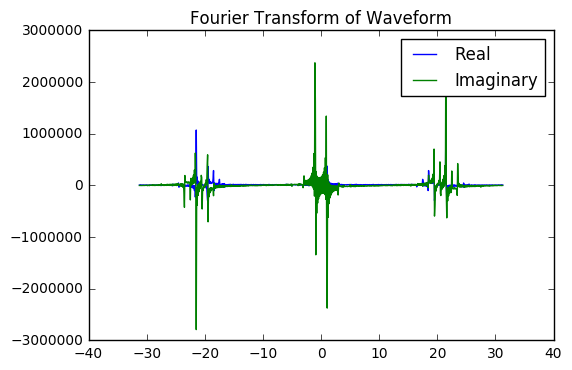

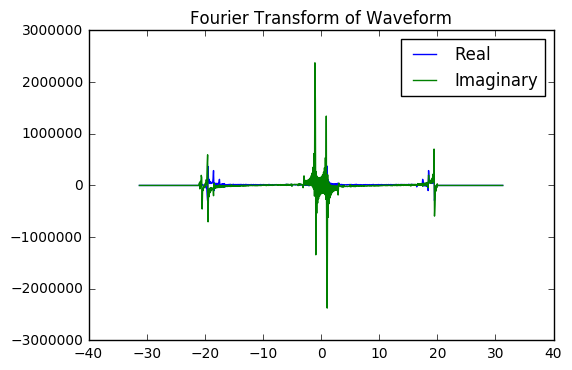

In [19]:
Vsamp = 62.5
N = 800
myFile = np.loadtxt('data_21')

time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
f_input = np.linspace(-Vsamp/2, (Vsamp/2)*(1 - (2/N)),N) #N distinct frequencies

#fourier transform
f,fx = ugradio.dft.dft(myFile[:N],t=time, f=f_input, vsamp=Vsamp)

#plot
plt.plot(f,fx.real, label = 'Real')
plt.plot(f,fx.imag, label = 'Imaginary')
plt.title("Fourier Transform of Waveform")
plt.legend()
plt.show()

# zeroing both the real and imag portion of sum frequency components
for x in range(0, len(f)):
    if f[x]>= 20 or f[x]<=-21:
        fx.real[x]=0
        fx.imag[x]=0
        
plt.plot(f,fx.real, label = 'Real')
plt.plot(f,fx.imag, label = 'Imaginary')
plt.title("Fourier Transform of Waveform")
plt.legend()
plt.show()

## Filtered Fourier Transforms
Recreate the signal from the filtered transform by taking the inverse transform and plot the filtered signal vs time. Explain what you see. 

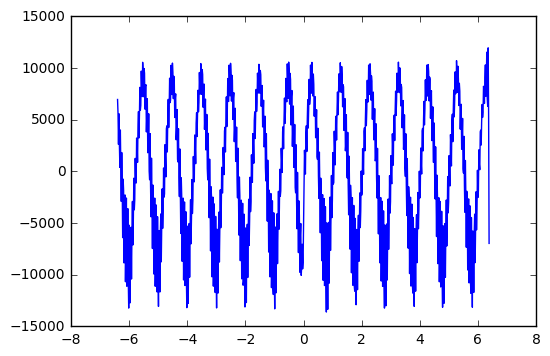

In [33]:
# inverse FT of wavefunction of sum frequency
t, xt = ugradio.dft.idft(fx, f=f, t=time)
plt.plot(t,xt)
plt.show()

# 6.2 Real Mixers: Intermodulation Products
Look at one of the above power spectrum plots with the gain turned up so you can see weak signals. What do you see? A forest of lines? What are these? Look at your forest of lines and see if you can identify how some of the stronger ones come about.

# 6.3 The Sideband - Separating Mixer (SSB Mixer)
Construct an SSB mixer that achieves the phase delay with a cable. We will use it to experiment with no phase delay (short cable) and a 90-degree phase delay (a long cable). With this two-output mixer, ue the two SRS sythesizer oscillators as inputs, as before. 

### 6.3.1 As a DSB Mixer
First, see what happends when the phase delay cable is short (ideallly zero), so that the two halves are essentially identical and have only a small relative phase delay. Pick a value for df and take time series data for the two corresponding values for Fsig. (these are the upper and lower side bands). Calculate the power spectra. When taking the Fourier transform, be sure to make the inputs complex-- you have two simultaneous samples, one real and one imaginary. Looking at the power spectra alone, can you distingush between positive and negative df?

### Non delayed data

In [ ]:
x = ugradio.pico.capture_data('1V', divisor=1, dual_mode=True, nsamples=1000)
np.savetxt('data_20_nd', x)

In [7]:
x = ugradio.pico.capture_data('1V', divisor=1, dual_mode=True, nsamples=1000)
np.savetxt('data_30_nd', x)

In [8]:
def PS_25(testFile):
    myFile = np.loadtxt(testFile)
    Vsamp = 25
    N = 800

    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    f_input = np.linspace(-Vsamp/2, (Vsamp/2)*(1 - (2/N)),N) #N distinct frequencies
    f,fx = ugradio.dft.dft(myFile[:N],t=time, f=f_input, vsamp=Vsamp)
    P = np.abs(fx)**2

    plt.plot(f,P)
    plt.xlabel("Frequency [MHz]")
    plt.ylabel("Signal")
    plt.show()


### Difference Frequencies with Small Delay

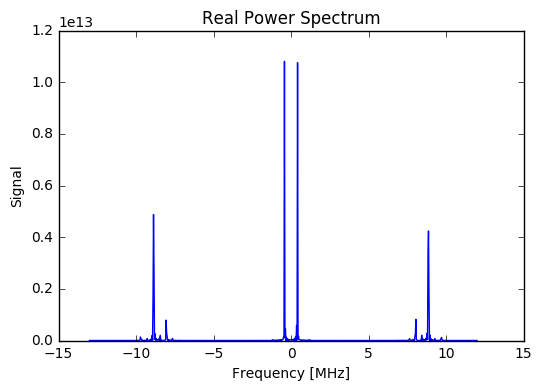

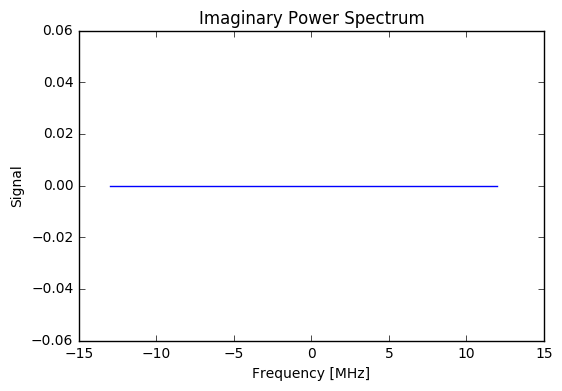

In [9]:
x = np.loadtxt('data_20_nd')
a = x[0:999]
b = x[1000:1999]

plt.title('Real Power Spectrum')
PS_25(a)

plt.title('Imaginary Power Spectrum')
PS_25(b)

### Sum Frequencies with Small Delay

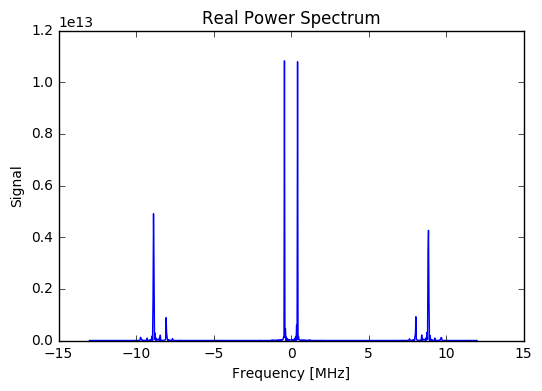

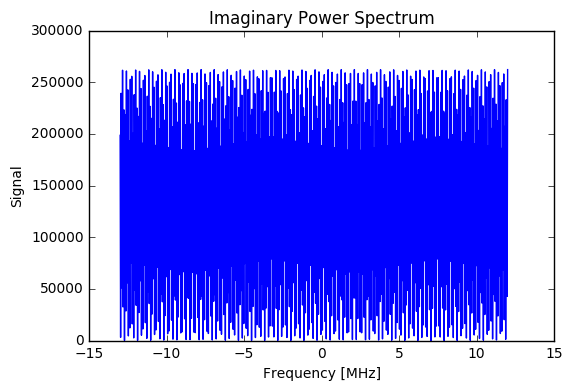

In [10]:
x = np.loadtxt('data_30_nd')
a = x[0:999]
b = x[1000:1999]

plt.title('Real Power Spectrum')
PS_25(a)

plt.title('Imaginary Power Spectrum')
PS_25(b)

## 6.3.2 The SSB Mixer
Now see what happens when the phase delay cable introduces a relataive phase delay of 90 degrees between the l.o signals going to the two mixers. Repeat what you did in 6.3.1. Looking at the power spectra alone, can you distingush between positive and negative df?

In [11]:
x = ugradio.pico.capture_data('1V', divisor=1, dual_mode=True, nsamples=1000)
np.savetxt('data_20_d', x)

In [12]:
x = ugradio.pico.capture_data('1V', divisor=1, dual_mode=True, nsamples=1000)
np.savetxt('data_30_d', x)

### Difference Frequencies with Delay

In [13]:
def Wave_25(file,Vsig):
    
    Vsamp = 25 #MHz
    N = 512
    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    
    print('Vsig = {}{}'.format(Vsig, 'MHz'))
    file9 = np.loadtxt(file)
    
    plt.subplot(3,1,1)
    
    
    #time domain signal - plot digitally sampled waveform vs time
    plt.plot(time[N/2:N/2 + 21],file9[N/2:N/2 + 21],'k.-')
    
    plt.xlabel("Time [micro sec]")
    plt.ylabel("Signal")
    plt.show()

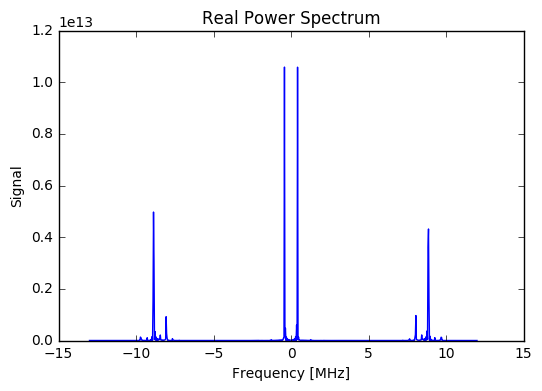

Vsig = 20MHz


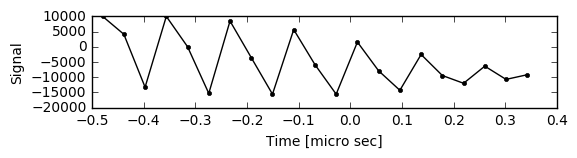

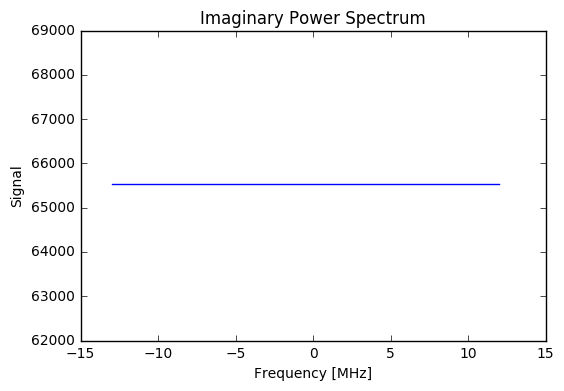

Vsig = 20MHz


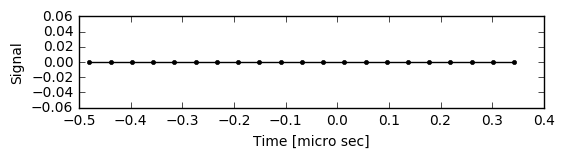

In [16]:
x = np.loadtxt('data_20_d')
a = x[0:999]
b = x[1000:1999]

plt.title('Real Power Spectrum')
PS_25(a)
Wave_25(a, Vsig = 20)

plt.title('Imaginary Power Spectrum')
PS_25(b)
Wave_25(b, Vsig = 20)

### Sum Frequencies with Delay

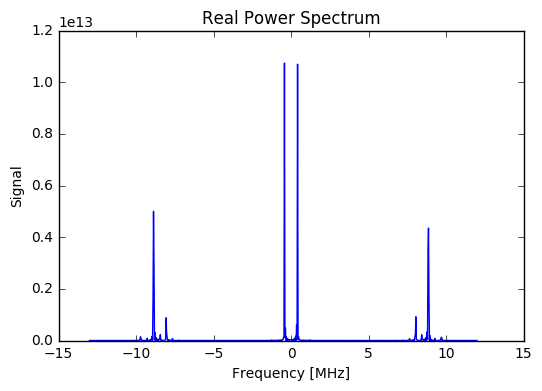

Vsig = 30MHz


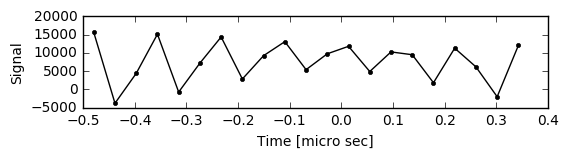

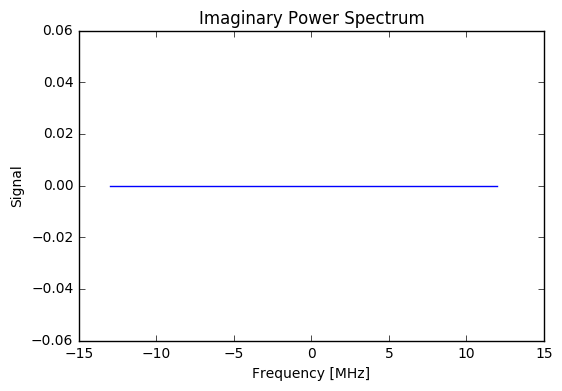

Vsig = 30MHz


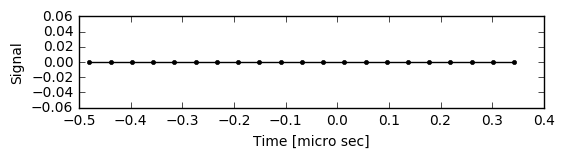

In [17]:
x = np.loadtxt('data_30_d')
a = x[0:999]
b = x[1000:1999]

plt.title('Real Power Spectrum')
PS_25(a)
Wave_25(a, Vsig = 30)

plt.title('Imaginary Power Spectrum')
PS_25(b)
Wave_25(b, Vsig = 30)

If you have the time and inclination, verify that the phase difference between the two mixer outputs behaves as shown in Figure 3. Why does it behave this way?